### practice for simple single image deblur in conda env

In [2]:
import numpy as np
import cv2
import scipy
import matplotlib.pyplot as plt

Image shape: (2048, 1536, 3)


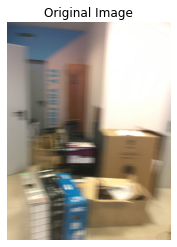

In [3]:
image_path = 'data/toy_dataset/0_IPHONE-SE_M.JPG'  # Replace with the path to your image file
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    print(f"Error: Unable to read the image at '{image_path}'")
else:
    # Display the shape of the image (height, width, channels)
    print("Image shape:", image.shape)

    # Display the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')  # Turn off axis labels
    plt.show()

In [14]:
def generate_gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x - (size-1)/2)**2 + (y - (size-1)/2)**2) / (2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

In [15]:
def wiener_deconvolution(blurred_image, kernel, noise_var):
    # Perform Fourier transforms
    blurred_fft = np.fft.fft2(blurred_image)
    
    # Zero-pad the kernel to match the size of the image
    padded_kernel = np.zeros_like(blurred_image)
    kernel_size = kernel.shape[0]
    padded_kernel[:kernel_size, :kernel_size] = kernel
    
    kernel_fft = np.fft.fft2(padded_kernel)
    
    # Apply Wiener deconvolution
    result_fft = np.conj(kernel_fft) / (np.abs(kernel_fft)**2 + noise_var) * blurred_fft

    # Inverse Fourier transform to get the deconvolved image
    result = np.abs(np.fft.ifft2(result_fft))

    return result


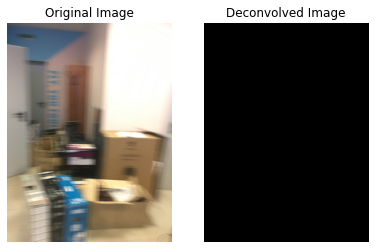

In [16]:
# Generate a random blur kernel
kernel_size = 3  # Adjust the kernel size as needed
blur_kernel = generate_blur_kernel(kernel_size)

# Add simulated noise to the blurred image
noise_var = 1e-3

# Perform Wiener deconvolution
deconvolved_image = wiener_deconvolution(image, blur_kernel, noise_var)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(deconvolved_image.astype(np.uint8))
plt.title('Deconvolved Image')
plt.axis('off')

plt.show()
